**K Nearest Neighors**

This is a distance-based estimation approach

The idea is that if we have some type of similarity measure for specimens, we can find the k most similar individuals in the data set, (based on the predictors **X**)  and use their average or median target value (yave) as the predicted value

There are different types of distance measures possible, and there is a variant in which instead of specifying k neighbors,  we specify a radius, and use the average or median of all individuals within that radius

Example is taken from

https://scikit-learn.org/stable/modules/neighbors.html#classification

**Classification Example using the Iris dataset**

In [1]:


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Set up the classifier to use 11 nearest neighbors

This is a pipeline with the standard scaler as well, so all variables are treated in an equal way

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

**Weighting**

It is possible to weight all the 11 nearest neighbors equally, or to weight them based on distance, so that closer individuals are weighted more heavily than distance individuals

In the code below,   the member function clf.set_params is used to specify the
weighting in use, and the model is fitted to the data

There is then a section estimating the boundaries between the three groups in the data set, and the graph shows different ranges of several variables used in the classification

This plot is called a decision boundary, and shows a bit about how the model is operating

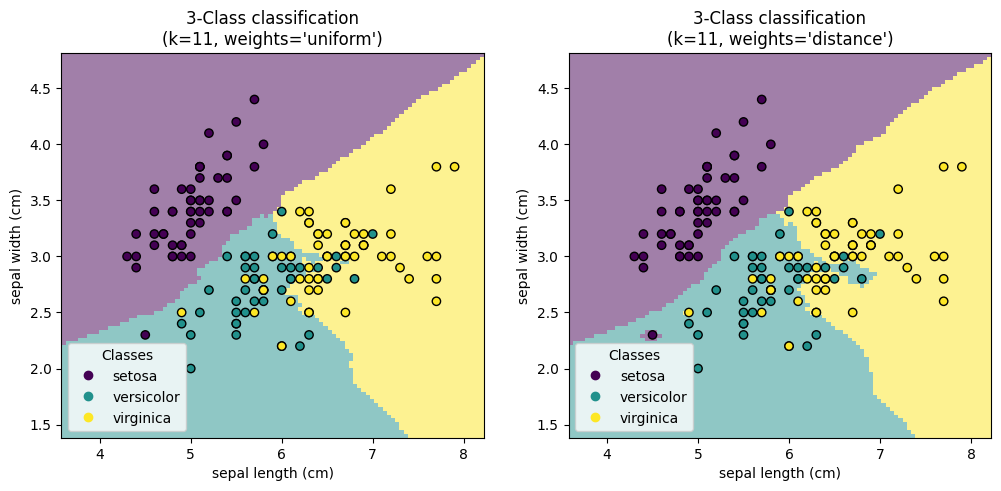

In [4]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

# Action:

Create the same decision boundary plots for variables 2 and 3 of the iris data set

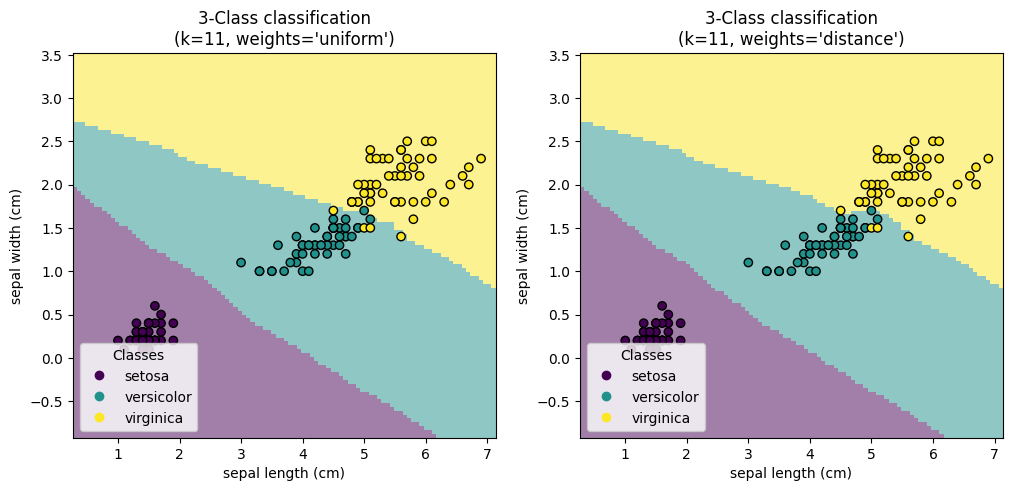

In [20]:
X2 = iris.data[['petal length (cm)', 'petal width (cm)']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, stratify=y, random_state=0)

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X2_train, y2_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X2_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

# Action

Find the accuracy for the two models (one with no weighting and one with distance weighting)

In [27]:
from sklearn.metrics import accuracy_score

clf_uniform = clf.set_params(knn__weights="uniform")
clf_uniform.fit(X2_train, y2_train)

y_pred_uniform = clf_uniform.predict(X2_test)

accuracy_uniform = accuracy_score(y2_test, y_pred_uniform)
accuracy_uniform

0.9736842105263158

In [28]:
clf_distance = clf.set_params(knn__weights="distance")
clf_distance.fit(X2_train, y2_train)

y_pred_distance = clf_distance.predict(X2_test)

accuracy_distance = accuracy_score(y2_test, y_pred_distance)
accuracy_distance

0.9736842105263158

**Nearest Neighbor Regression**

In [29]:
#generate sample data

import matplotlib.pyplot as plt
import numpy as np

from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

Fit the model

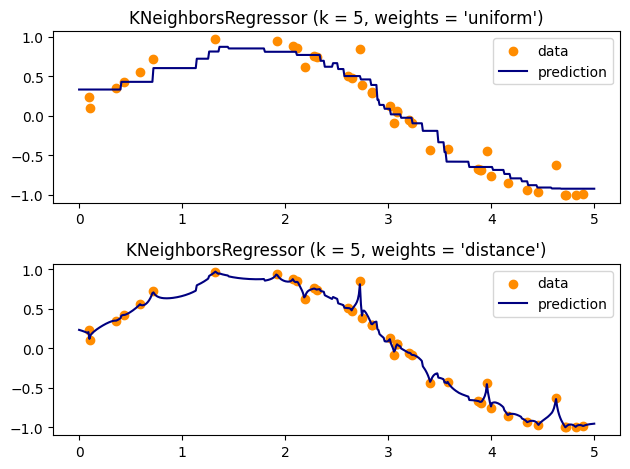

In [30]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()


# Action: Explain what these two Plots are showing you

The weighted distance is overfit to the training data

# Action

Find the R^2,   Mean squared error,  Mean absolute error and F score for these two models

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')

knn.fit(X, y)

y_pred_distance = knn.predict(X)

r2_score(y, y_pred_distance), mean_squared_error(y, y_pred_distance)

(0.9639580074451758, 0.015297339048254843)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')

knn.fit(X, y)

y_pred_distance = knn.predict(X)

r2_score(y, y_pred_distance), mean_squared_error(y, y_pred_distance)

(1.0, 0.0)

# Homework

Don't try to do this in class, it will take a bit of time, and you need to look at the notebooks on overfitting and underfitting before attempting to do this

Start with the regression model example, and create two additional data sets, one for cross validation and one for testing.    Each should be generated the same way the data set was here,   and should be the same size.

Then look at the KNN model using the distance weighting.   Changing the K values will alter the degree of complexity of the model,   or more accurately the level of generality of the model.

Use your data and the cross validation data to determine what value of K is optimal for a distance weighted K nearest neighbor regression model.

Show plots like the one above showing the data and predictions for the ideal model, and models with too many and too few neighbors used